In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [4]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [5]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


In [ ]:
slightly more expendature than revenue on average.
higher math avg score than reading avg


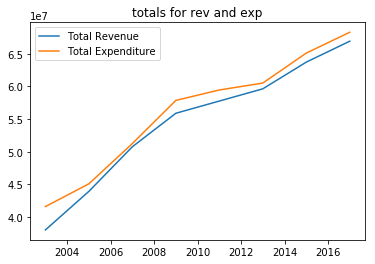

In [7]:
plt.plot(education_df.loc[education_df.STATE == 'NEW_YORK', 'YEAR'],
         education_df.loc[education_df.STATE == 'NEW_YORK', 'TOTAL_REVENUE'], label='Total Revenue')

plt.plot(education_df.loc[education_df.STATE == 'NEW_YORK', 'YEAR'],
        education_df.loc[education_df.STATE == 'NEW_YORK', 'TOTAL_EXPENDITURE'], label='Total Expenditure')

plt.title('totals for rev and exp')
plt.legend()
plt.show()

there is a steady increase in New Yorks budget over the years.  From 2009 until 2013 there is very little increase compared to previous years.  The economic recession of 2008 might explain the reduced increase since was tighter.  Despite this, at least their budget did not decrease.

<BarContainer object of 8 artists>

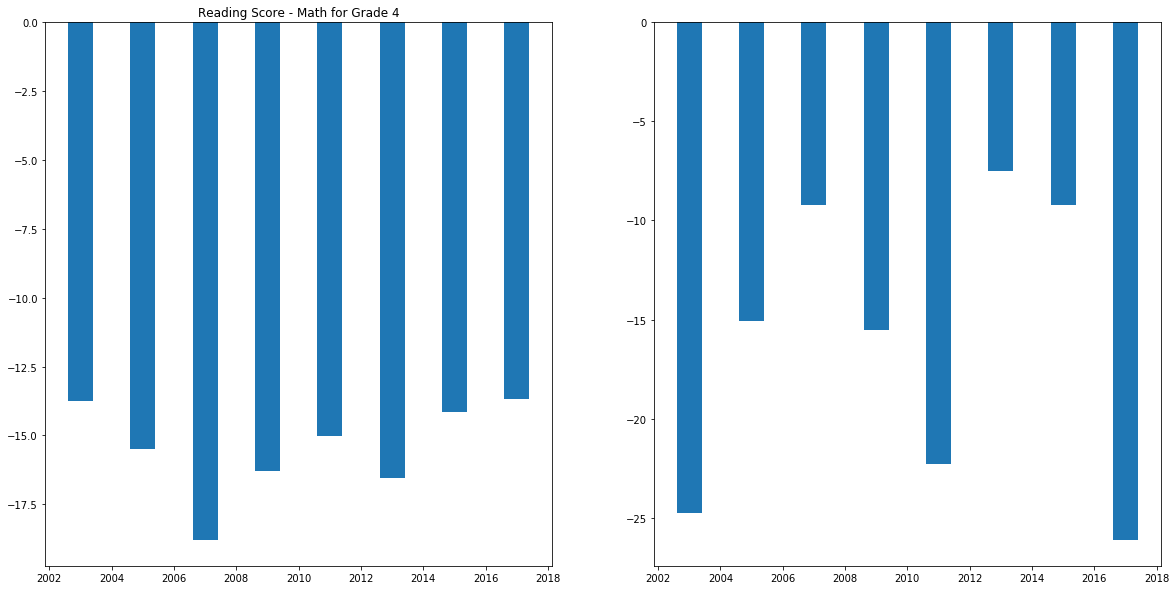

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.bar(education_df.loc[education_df.STATE == 'NEW_YORK', 'YEAR'],
       education_df.loc[education_df.STATE == 'NEW_YORK', 'AVG_READING_4_SCORE'] - education_df.loc[education_df.STATE == 'NEW_YORK', 'AVG_MATH_4_SCORE'])

plt.title('Reading Score - Math for Grade 4')
plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == 'NEW_YORK', 'YEAR'],
       education_df.loc[education_df.STATE == 'NEW_YORK', 'AVG_READING_8_SCORE'] - education_df.loc[education_df.STATE == 'NEW_YORK', 'AVG_MATH_8_SCORE'])


In [18]:
print('Difference between Reading and Math Grade 8')
print(education_df.loc[education_df.STATE == 'NEW_YORK', 'AVG_READING_8_SCORE'] - education_df.loc[education_df.STATE == 'NEW_YORK', 'AVG_MATH_8_SCORE'])

print('Difference between Reading and Math Grade 4')
print(education_df.loc[education_df.STATE == 'NEW_YORK', 'AVG_READING_4_SCORE'] - education_df.loc[education_df.STATE == 'NEW_YORK', 'AVG_MATH_4_SCORE'])

Difference between Reading and Math Grade 8
605    -24.738429
708    -15.056885
813     -9.203327
921    -15.509059
1025   -22.259762
1129    -7.500056
1231    -9.235509
1479   -26.109457
dtype: float64
Difference between Reading and Math Grade 4
605    -13.741868
708    -15.478777
813    -18.790991
921    -16.272350
1025   -15.026132
1129   -16.536454
1231   -14.150624
1479   -13.664442
dtype: float64


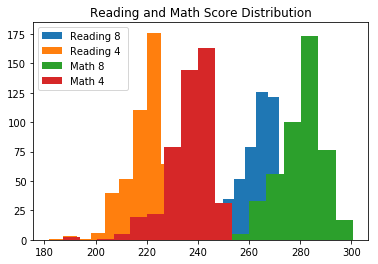

In [34]:
plt.hist(education_df['AVG_READING_8_SCORE'], label='Reading 8 ' )
plt.hist(education_df['AVG_READING_4_SCORE'], label='Reading 4 ' )
plt.hist(education_df['AVG_MATH_8_SCORE'], label='Math 8 ')
plt.hist(education_df['AVG_MATH_4_SCORE'], label='Math 4 ')

plt.title('Reading and Math Score Distribution')
plt.legend(loc="upper left")
plt.show()


In [35]:
#reload data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

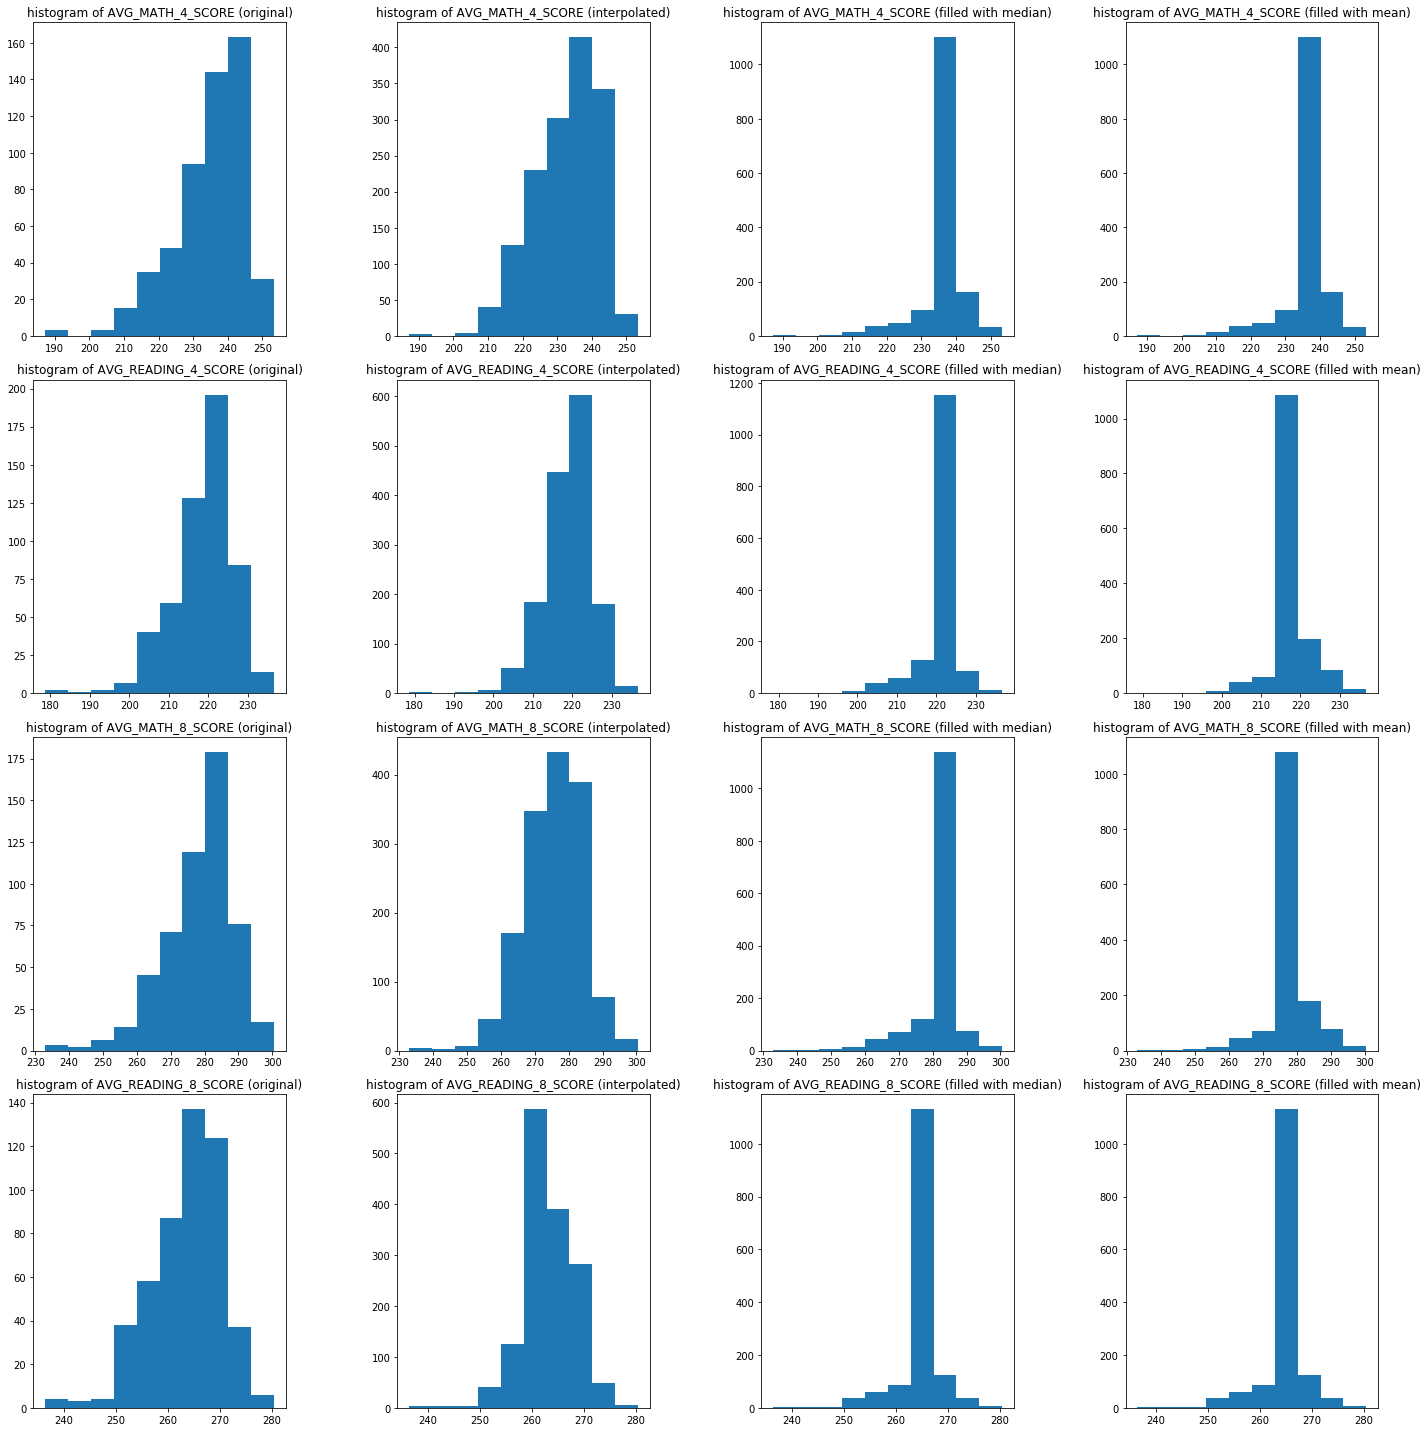

In [38]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

interpolation seems to provide the best solution for filling in missing values.